# Glassdoor Salaries

## Salary Prediction Model

WIP

## Model setup

We need to import all the modules we'll be using from numpy, scipy, and keras:

In [1]:
import matplotlib.pyplot as plt

from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom
from scipy.io import mmread
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import math
import csv
import random

from keras import backend as K
import keras
import json
import sys
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input, Embedding, Flatten
from keras.layers.convolutional import Convolution1D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
%pwd
%matplotlib inline

Define Location of data directory and load training matrix into sparse matrix.


In [3]:
data_dir = '/home/ubuntu/full'
sparse_training_matrix = mmread('%s/training-matrix.txt' % data_dir)
print "Done"

Done


- sparse matrix text = training row + " " + column (where value is +1)

Notes:

'''
a.todense() or a.M - Return a dense matrix representation of this matrix. (numpy.matrix)
a.A - Return a dense ndarray representation of this matrix. (numpy.array)
'''


In [4]:
print sparse_training_matrix.shape
#print sparse_training_matrix.getrow(568370)
#print coo_matrix(sparse_training_matrix.getrow(568370), dtype=np.bool)
print "Done"

(6516817, 1812571)
Done


In [5]:
def salaryToTarget(salary):
    return int(round((max((min((salary * 1.0, 595000.0)), 15000))-15000) / 5000, 0)) + 1

def targetToSalary(target):
    return ((target - 1) * 5000) + 15000

def logSalaryToTarget(logSalary):
    return salaryToTarget(math.pow(math.e, logSalary))

def percentErrorSalary(target, prediction):
    targetSalary = targetToSalary(target)
    predictedSalary = targetToSalary(prediction)
    return round(abs(((targetSalary - predictedSalary)*1.0) / targetSalary),4)


print salaryToTarget(15000)
print salaryToTarget(25000)
print salaryToTarget(2500000)
print targetToSalary(8)
print logSalaryToTarget(10.3089859934221)
print percentErrorSalary(80,100)
print percentErrorSalary(70,100)

    
#targets = mmread('%s/training-matrix.txt' % data_dir)

1
3
117
50000
4
0.2439
0.4167


In [6]:
# list all data in history
# print(history.history.keys())
# historyValues = history.history

def plot(history):

    # summarize history for accuracy
    if 'acc' in history:
        plt.plot(history['acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('')
        plt.show()

    # summarize history for loss
    if 'loss' in history:
        plt.plot(history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('')
        plt.show()

    # RMSE for salary *value*
    if 'error' in history:
        plt.plot(history['error'])
        plt.title('model salary % error')
        plt.ylabel('%')
        plt.xlabel('')
        plt.show()


In [7]:
# Load salaries data

salaries = np.zeros((6516817, 118), dtype=np.bool)

with open('%s/log-salaries-truncated.csv' % data_dir,'r') as dest_f:
    data_iter = csv.reader(dest_f)
    for row in data_iter:
        x_index = int(row[0])
        if x_index < 6516817:
            salaries[x_index][logSalaryToTarget(float(row[1]))] = True 
    
print "Created salaries"

Created salaries


## Model creation

### Features

- Binary vector of length 1812571 
- Each row is a 

### Training Data

- Log salary
- Salaries: $15K => $600K
- Divide into classes of $5K ranges => 117 classes

### Targets

- 118 length vector
- Note: 0 should be ignored


Define the model

In [8]:
def PhillipSalary1():
    model = Sequential()
    #model.add(Embedding(128, 32, input_length=1812571))
    #model.add(Convolution1D(4, 3, activation='relu'))
    #model.add(Flatten())
    model.add(Dense(32, input_shape=(1812571,), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(118, activation='softmax'))
    return model

- sdf


In [9]:
try:
    del model
except NameError:
    pass
    
#K.clear_session()

    
model = PhillipSalary1()

In [10]:
lr = 0.01

In [11]:
model.compile(optimizer=RMSprop(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
csr_sparse_training_matrix = csr_matrix(sparse_training_matrix, dtype=np.bool)

Training - ....................................................................................................Done.


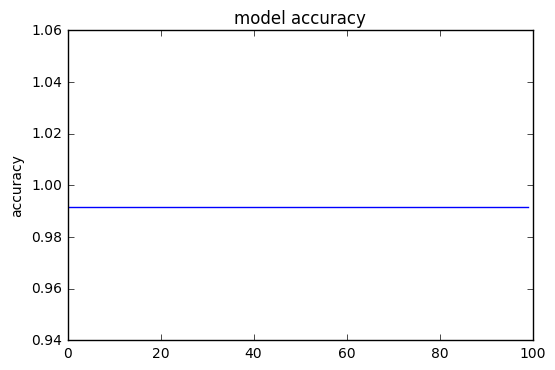

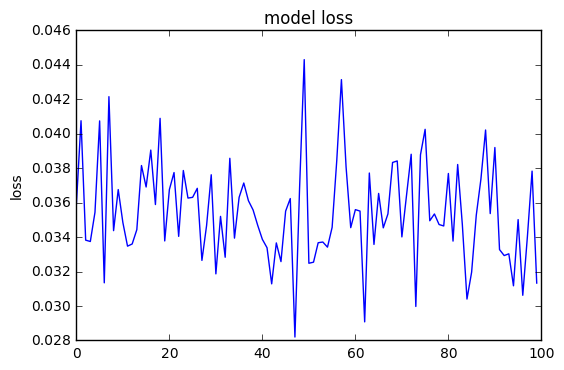

In [32]:
history = { 'loss': [], 'acc': [] }
m = 2000

sys.stdout.write('Training - ')

for n in range(m):
    
    segment = random.randint(1, 12000)
    start = 512 * segment
    end = start + 512
    
    test_y = salaries[start:end]
    #print "Finished Salary Matrix: "
    #print test_y

    #test_x = [] 
    test_x = csr_sparse_training_matrix[start:end].todense()

    #print "Finished CSR Training Matrix"

    #print test_x
    #test_x_a = test_x.A

    #test_x.shape
    #for n in range(10)
    #print "Training Set:     %s" % len(test_x_a)

    #print "Training targets: %s" % len(test_y)

    #print "Features:         %s" % len(test_x_a[0])

    #y = np.zeros(118, dtype=np.int32)
    #y[18] = 1
    #y            
    (loss, acc) = model.train_on_batch(x=test_x, y=test_y)
    if n % 20 == 0:
        sys.stdout.write('.')
        history['loss'].append(loss)
        history['acc'].append(acc)

print 'Done.'
plot(history)    


32/32 [==============================] - 0s
Done:


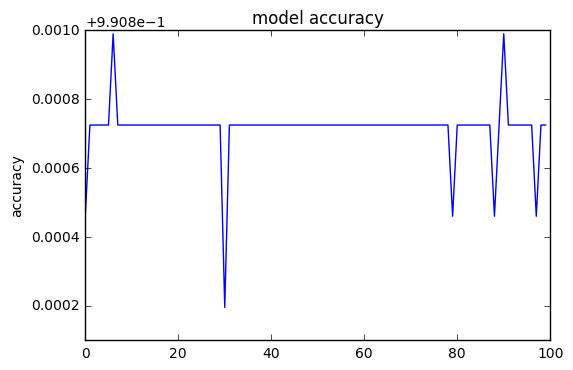

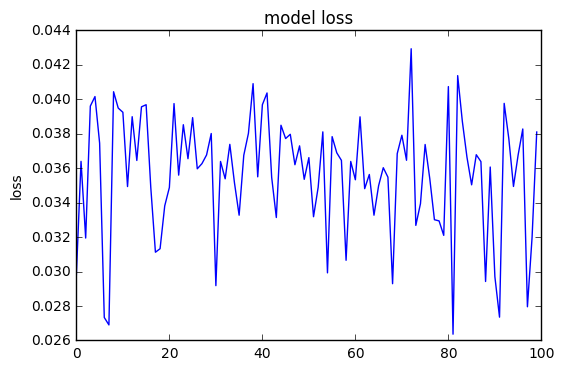

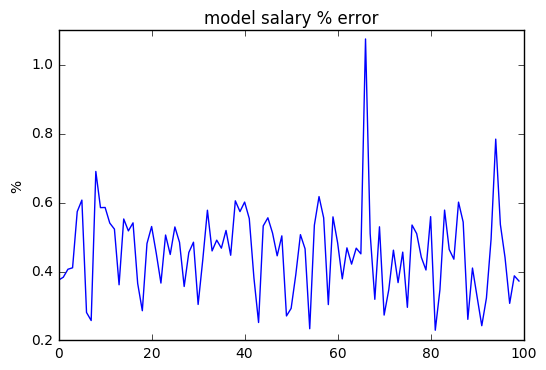

In [33]:
history = { 'loss': [], 'acc': [], 'error': [] }

for n in range(100):
    
    segment = random.randint(1, 12000)
    start = 32 * segment
    end = start + 32
    
    test_y = salaries[start:end]
    #print "Finished Salary Matrix: "
    #print test_y

    #test_x = [] 
    test_x = csr_sparse_training_matrix[start:end].todense()
    
    predictions =  model.predict(x=test_x)
    results = model.evaluate(x=test_x, y=test_y)
    
    errors = []
    curr = 0
    for prediction in predictions:
        try:
            errors.append(percentErrorSalary(np.argmax(test_y[curr]),np.argmax(prediction)))
        except IndexError:
            print "error..."
        curr += 1
    total_error = 0
    
    for error in errors:
        total_error += error
    
    if len(errors):
        history['error'].append(total_error / len(errors))
        history['acc'].append(results[1])
        history['loss'].append(results[0])


print "Done:"
plot(history)

In [34]:
model.save_weights("model-linear-4.h5")